<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/celsius_fahrenheit_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
x = np.array([-40, -10, 0, 8, 15, 22, 38])
y = np.array([-40, 14, 32, 46, 59, 72, 100])

n = len(x) # Number of data points

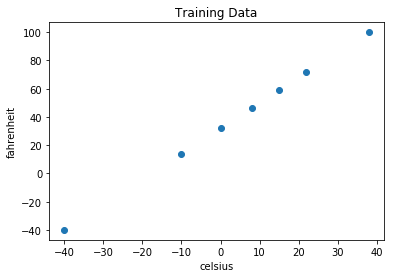

In [697]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel("celsius") 
plt.ylabel("fahrenheit") 
plt.title("Training Data") 
plt.show() 

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
W = tf.Variable(np.random.randn())
b = tf.Variable(0.)

In [0]:
learning_rate = 0.01
training_epochs = 1000

# Hypothesis 
Ypred = tf.multiply(X, W) + b

# Mean Squared Error Cost Function 
cost = tf.reduce_sum((Ypred - Y) ** 2) / (2 * n)

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [701]:
costs=[]

# Global Variables Initializer 
init = tf.global_variables_initializer() 

# Starting the Tensorflow Session 
with tf.Session() as sess: 
          
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs):
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            costs.append(c)
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b)

Epoch 50 : cost = 173.33783 W = 2.2887588 b = 14.902059
Epoch 100 : cost = 47.400227 W = 2.0406418 b = 22.86562
Epoch 150 : cost = 13.134603 W = 1.9111112 b = 27.023018
Epoch 200 : cost = 3.825904 W = 1.8434907 b = 29.193369
Epoch 250 : cost = 1.3044924 W = 1.8081887 b = 30.326406
Epoch 300 : cost = 0.6254409 W = 1.7897593 b = 30.91792
Epoch 350 : cost = 0.44461226 W = 1.7801386 b = 31.22672
Epoch 400 : cost = 0.39755827 W = 1.7751158 b = 31.38792
Epoch 450 : cost = 0.38588682 W = 1.7724938 b = 31.472076
Epoch 500 : cost = 0.38331228 W = 1.7711248 b = 31.516016
Epoch 550 : cost = 0.38292852 W = 1.7704098 b = 31.538956
Epoch 600 : cost = 0.38298255 W = 1.7700365 b = 31.550951
Epoch 650 : cost = 0.38309282 W = 1.7698424 b = 31.557163
Epoch 700 : cost = 0.38316208 W = 1.7697415 b = 31.560408
Epoch 750 : cost = 0.38319853 W = 1.769689 b = 31.562101
Epoch 800 : cost = 0.38323358 W = 1.7696594 b = 31.563036
Epoch 850 : cost = 0.38324228 W = 1.7696455 b = 31.56349
Epoch 900 : cost = 0.3832494

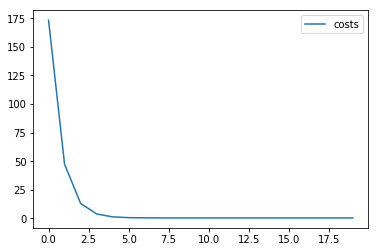

In [702]:
plt.plot(costs, label="costs")
plt.legend()

In [703]:
predictions = weight*x + bias
print(weight*100 + bias)

208.52692461013794


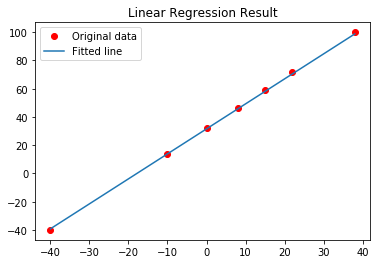

In [704]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ="Original data") 
plt.plot(x, predictions, label ="Fitted line") 
plt.title("Linear Regression Result") 
plt.legend() 
plt.show()